<a href="https://colab.research.google.com/github/floredepeint/demo_isds/blob/main/exercice_4_module_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Téléchargement des packages nécessaires

library (tidyverse)
install.packages("rsq")
require(rsq)
library(ggplot2)
install.packages("descr")
require(descr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘lme4’, ‘Deriv’


Loading required package: rsq

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘xtable’


Loading required package: descr



In [3]:
#Ouvrir le fichier

path_to_csv = 'https://github.com/Cours-EDUlib/FAS-ISDS/blob/main/module-6/Exercices/6-4_donnees.csv?raw=true'

bd <- read_csv(path_to_csv)
bd 

Warning message:
“Missing column names filled in: 'X1' [1]”
Warning message:
“Duplicated column names deduplicated: 'X1' => 'X1_1' [2]”

── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  X1_1 = col_double(),
  childs = col_double(),
  degree = col_double(),
  educ = col_double(),
  sei = col_double(),
  divorce = col_double()
)




X1,X1_1,childs,degree,educ,sei,divorce
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,1,12,434,0
2,2,0,3,17,389,0
3,3,1,4,18,351,0
4,4,1,0,6,625,1
5,5,1,0,8,171,0
6,6,1,3,17,692,1
7,7,1,1,12,298,1
8,8,1,1,13,377,1
9,9,0,1,13,377,0


Première partie de l'exercice

,Frequency,Percent
0,822,28.45275
1,2067,71.54725
Total,2889,100.00000


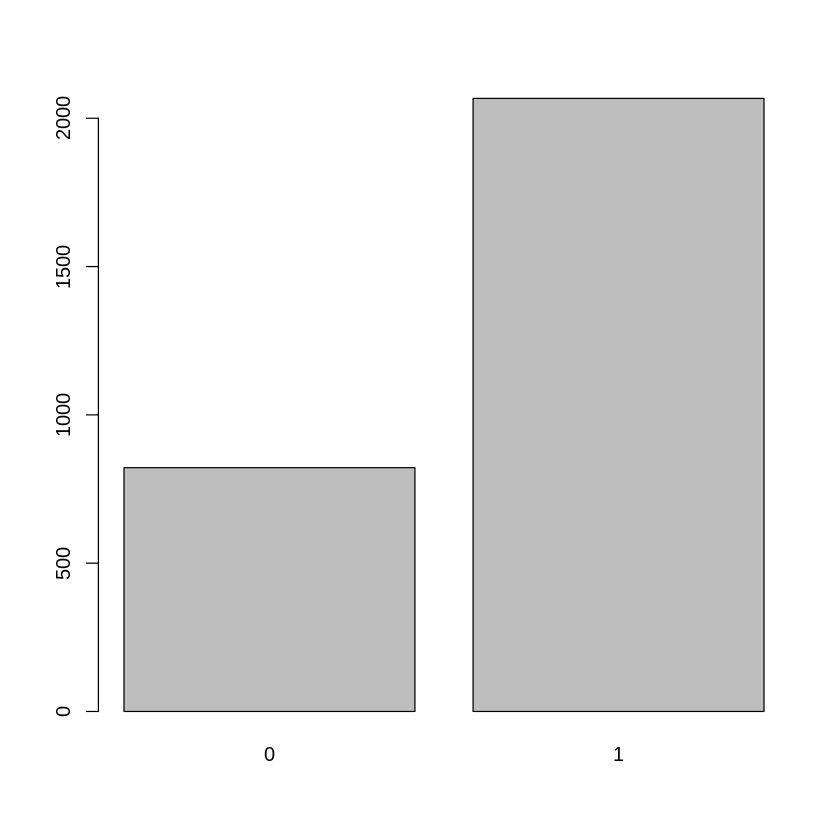

,Frequency,Percent
0,1871,64.76289
1,1018,35.23711
Total,2889,100.00000


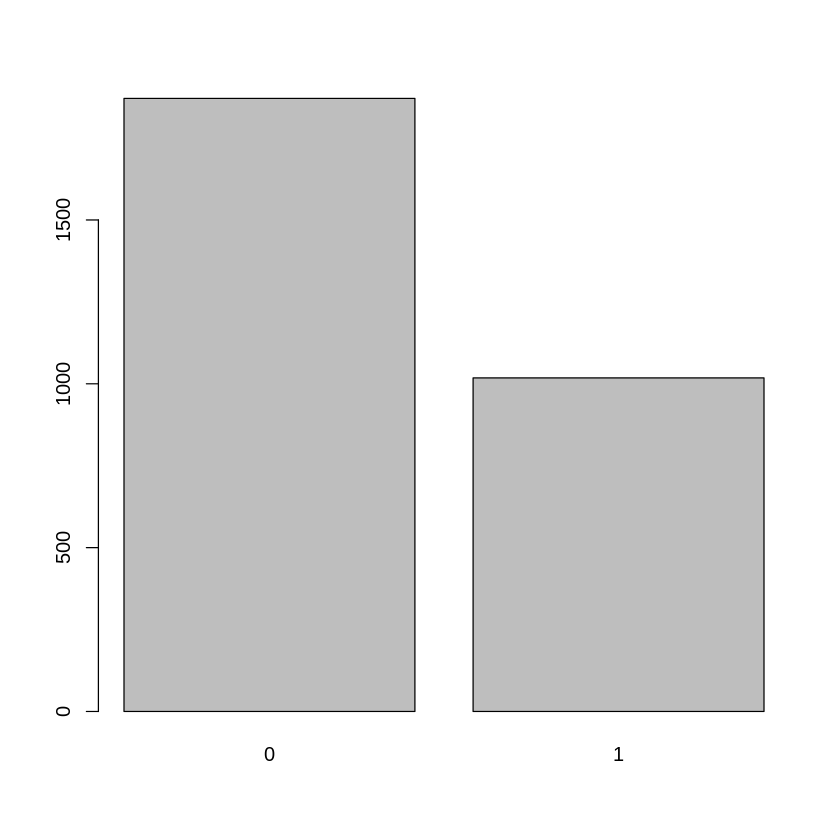

In [4]:
# Distribution des variables enfant et divorce

freq(bd$childs)
freq(bd$divorce)

In [5]:
# Regression logistique enfant et divorce

reglog <- glm(divorce ~ childs, data = bd, family="binomial")
summary(rstandard(reglog))
summary(reglog)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.03387 -0.89186 -0.89186 -0.09432  1.32956  1.49348 


Call:
glm(formula = divorce ~ childs, family = "binomial", data = bd)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0332  -0.8916  -0.8916   1.3288   1.4931  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.34900    0.07082  -4.928 8.32e-07 ***
childs      -0.36819    0.08492  -4.336 1.45e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3749.4  on 2888  degrees of freedom
Residual deviance: 3730.7  on 2887  degrees of freedom
AIC: 3734.7

Number of Fisher Scoring iterations: 4


In [6]:
# Calcule de la probabilité prédite

bd$pred <- predict(reglog, type = "response")
summary(bd$pred)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3280  0.3280  0.3280  0.3524  0.4136  0.4136 

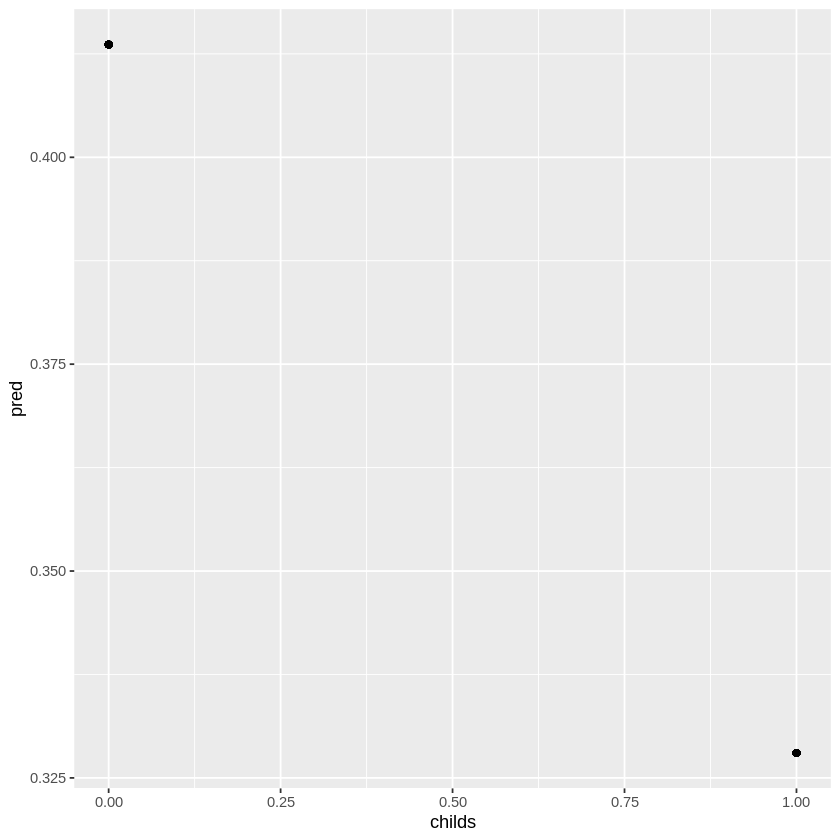

In [7]:
# Nuage de points (pas forcément pertinent sur du binaire pur)

ggplot(bd, aes(x = childs, y = pred)) +
  geom_point()

Seconde partie de l'exercice

In [24]:
# Identifier les données manquantes sur variable educ
 
 is.na(bd$educ)
missing <- which(is.na(bd$educ))

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
 [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

[1]  105  253  453  807 1469 1493 1530 1751 2563

In [29]:
# Retirer les données manquantes

bd2 <- na.omit(bd)
bd2

X1,X1_1,childs,degree,educ,sei,divorce,pred
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,1,12,434,0,0.4136253
2,2,0,3,17,389,0,0.4136253
3,3,1,4,18,351,0,0.3280116
4,4,1,0,6,625,1,0.3280116
5,5,1,0,8,171,0,0.3280116
6,6,1,3,17,692,1,0.3280116
7,7,1,1,12,298,1,0.3280116
8,8,1,1,13,377,1,0.3280116
9,9,0,1,13,377,0,0.4136253


In [30]:
# descriptif de la variable educ

summary(bd2$educ)
sd(bd2$educ, na.rm=TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   12.00   13.00   13.46   16.00   20.00 

[1] 2.898765

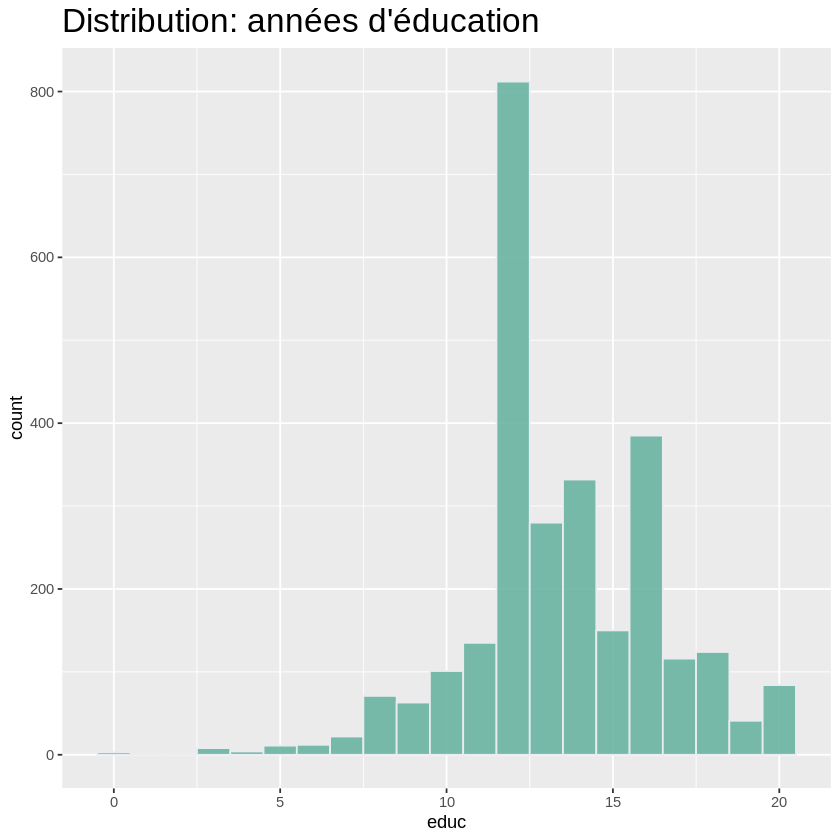

In [31]:
#Histogramme distribution variable educ 

ggplot(bd2, aes(x=educ)) +
  geom_histogram(binwidth=1, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Distribution: années d'éducation") +
    theme(
      plot.title = element_text(size=20)
    )

In [32]:
# Regression logistique educ et divorce

reglog2 <- glm(divorce ~ educ, data = bd2, family="binomial")
summary(rstandard(reglog2))
summary(reglog2)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.01703 -0.94433 -0.92217 -0.09328  1.43053  1.48460 


Call:
glm(formula = divorce ~ educ, family = "binomial", data = bd2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0127  -0.9441  -0.9219   1.4302   1.4830  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -0.40066    0.18866  -2.124   0.0337 *
educ        -0.01470    0.01374  -1.070   0.2847  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3582.1  on 2753  degrees of freedom
Residual deviance: 3580.9  on 2752  degrees of freedom
AIC: 3584.9

Number of Fisher Scoring iterations: 4


In [33]:
# Calcule de la probabilité prédite

bd2$pred2 <- predict(reglog2, type = "response")
summary(bd2$pred2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3330  0.3462  0.3562  0.3548  0.3596  0.4012 

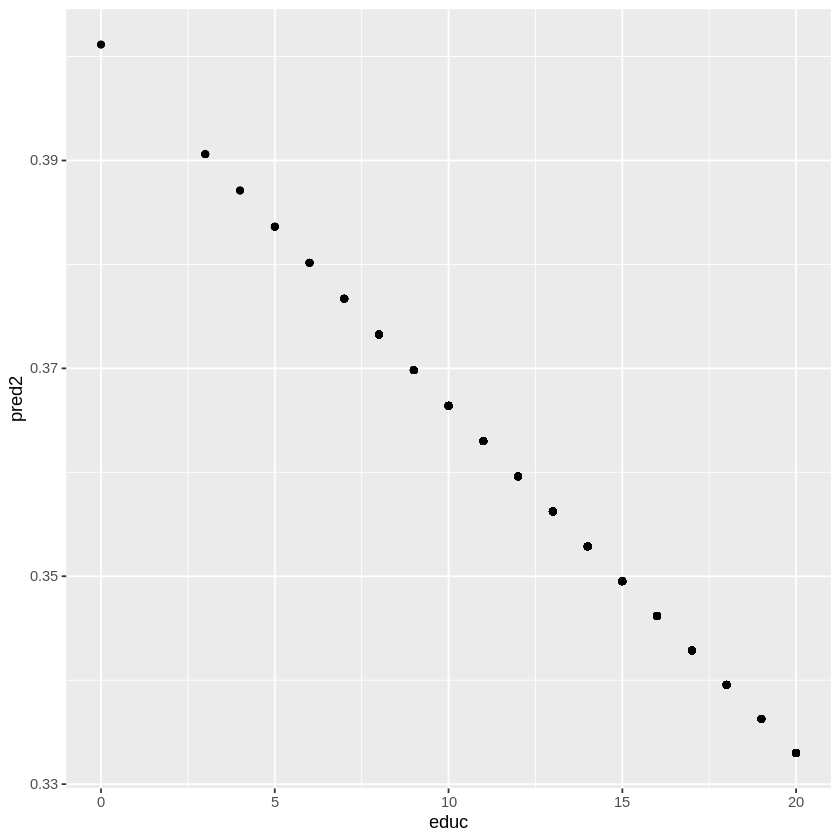

In [34]:
# Nuage de points (à la recherche de la valeur pour x=12)

ggplot(bd2, aes(x = educ, y = pred2)) +
  geom_point()